In [ ]:
# Import Requied libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the given dataset
df = pd.read_csv("/content/train.csv")

**Data Cleaning**


In [ ]:
# Check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# Check number of rows and columns in the dataset.
df.shape

(9800, 18)

In [ ]:
# Converting names of all columns in lowercase. 
df.rename(columns=str.lower,inplace=True)
df.head()

,row id,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,postal code,region,product id,category,sub-category,product name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
# Check for the nan values.
df.isna().sum()

row id            0
order id          0
order date        0
ship date         0
ship mode         0
customer id       0
customer name     0
segment           0
country           0
city              0
state             0
postal code      11
region            0
product id        0
category          0
sub-category      0
product name      0
sales             0
dtype: int64

In [ ]:
# Convert the order date and ship date in date datatype
df['order date'] = pd.to_datetime(df['order date'])
df['order date'].info()

df['ship date'] = pd.to_datetime(df['ship date'])
df['ship date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9800 entries, 0 to 9799
Series name: order date
Non-Null Count  Dtype         
--------------  -----         
9800 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.7 KB
<class 'pandas.core.series.Series'>
RangeIndex: 9800 entries, 0 to 9799
Series name: ship date
Non-Null Count  Dtype         
--------------  -----         
9800 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.7 KB


<ipython-input-7-7cdd95db018c>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['order date'] = pd.to_datetime(df['order date'])
<ipython-input-7-7cdd95db018c>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ship date'] = pd.to_datetime(df['ship date'])


In [ ]:
df[df['postal code'].isna()]

,row id,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,postal code,region,product id,category,sub-category,product name,sales
2234,2235,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
# The postal code of United States	Burlington	Vermont	is 05401 so replace nan values with 05401
df['postal code'].fillna('05401',inplace=True)
df['postal code'] = df['postal code'].astype(float)
df['postal code'].dtypes

dtype('float64')

**Data Visualization**

<ipython-input-47-afcdc7ad2bb7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar = True,linewidths = 0.8)


<Axes: >

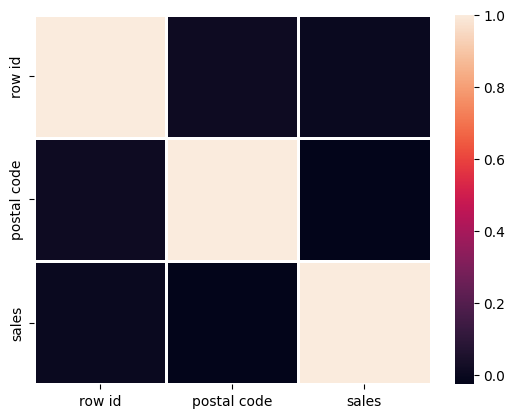

In [ ]:
sns.heatmap(df.corr(),cbar = True,linewidths = 0.8)

<ipython-input-65-337a49b97589>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="ship mode", y="sales", kind="bar", data=df,palette='Set1')


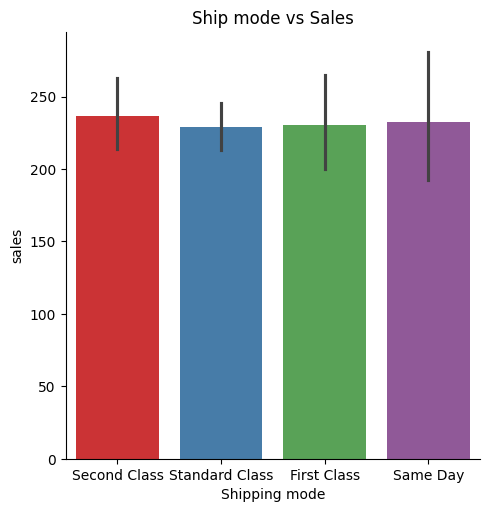

In [ ]:
sns.catplot(x="ship mode", y="sales", kind="bar", data=df,palette='Set1')
plt.xlabel('Shipping mode')
plt.ylabel('sales')
plt.title('Ship mode vs Sales')
plt.show()

<ipython-input-13-1cb7224e2291>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='category',y='sales',kind='bar',data=df,palette='pastel')


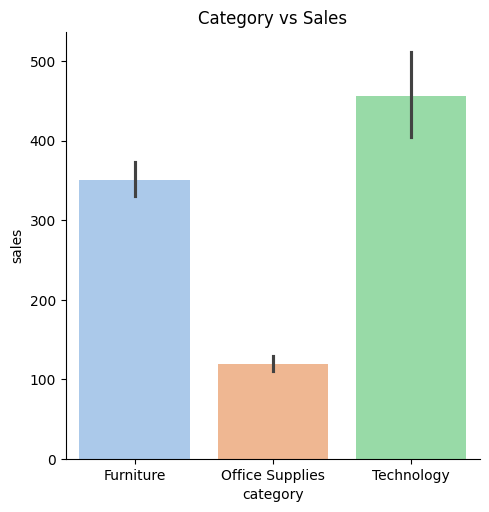

In [ ]:
sns.catplot(x='category',y='sales',kind='bar',data=df,palette='pastel')
plt.title('Category vs Sales')
plt.show()

<ipython-input-20-abfffc633497>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='order month',y='sales',data=month_sales,palette='Set1')
<ipython-input-20-abfffc633497>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='order quarter',y='sales',data=quarter_sales,palette='Set2')
<ipython-input-20-abfffc633497>:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='order year',y='sales',data=year_sales,palette='Set1')


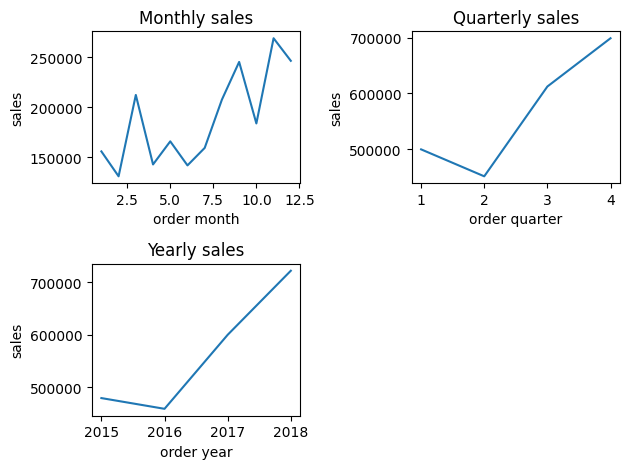

In [ ]:
# extracting different time periods.
df['order month'] = df['order date'].dt.month
df['order quarter'] = df['order date'].dt.quarter
df['order year'] = df['order date'].dt.year

# grouping time periods and calculating sales for the extracted time periods
month_sales = df.groupby('order month')['sales'].sum().reset_index()
quarter_sales = df.groupby('order quarter')['sales'].sum().reset_index()
year_sales = df.groupby('order year')['sales'].sum().reset_index()

# visualizing using line plot
plt.subplot(2,2,1)
sns.lineplot(x='order month',y='sales',data=month_sales,palette='Set1')
plt.title('Monthly sales')

plt.subplot(2,2,2)
sns.lineplot(x='order quarter',y='sales',data=quarter_sales,palette='Set2')
plt.title('Quarterly sales')

plt.subplot(2,2,3)
sns.lineplot(x='order year',y='sales',data=year_sales,palette='Set1')
plt.title('Yearly sales')

plt.tight_layout()

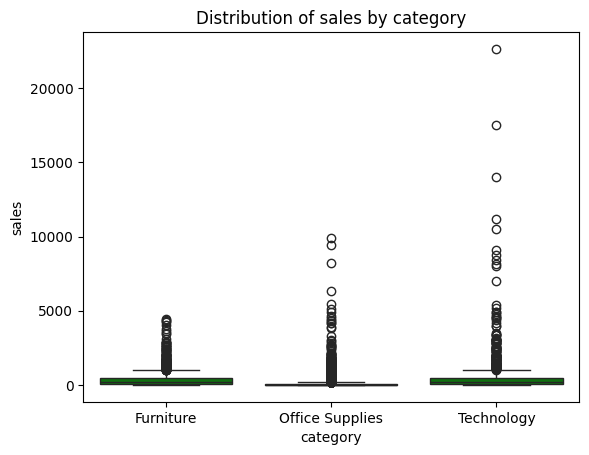

In [ ]:
# Box plot for distribution of sales by category
sns.boxplot(x='category',y='sales',data=df)
plt.title('Distribution of sales by category')
plt.show()

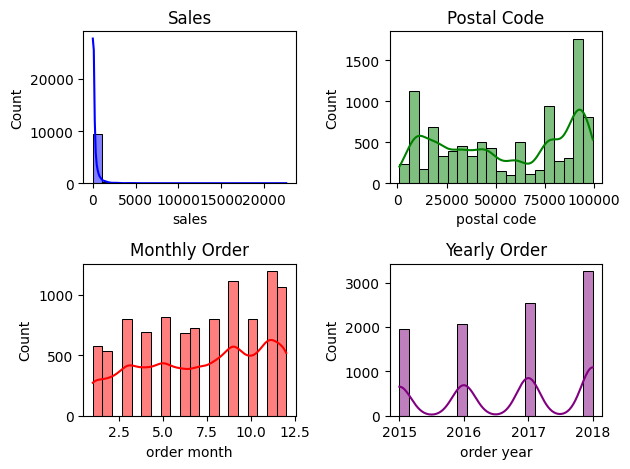

In [ ]:
# Histogram for different key numeric variables.
plt.subplot(2,2,1)
sns.histplot(df['sales'],bins=20,kde=True,color='blue')
plt.title('Sales')

plt.subplot(2,2,2)
sns.histplot(df['postal code'],bins=20,kde=True,color='green')
plt.title('Postal Code')

plt.subplot(2,2,3)
sns.histplot(df['order month'],bins=20,kde=True,color='red')
plt.title('Monthly Order')

plt.subplot(2,2,4)
sns.histplot(df['order year'],bins=20,kde=True,color='purple')
plt.title('Yearly Order')

plt.tight_layout()

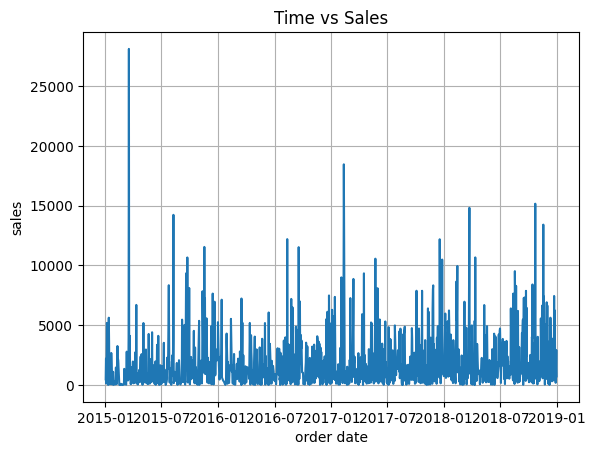

In [ ]:
# Time series graph to understand trends in sales
daily_sales = df.groupby('order date')['sales'].sum().reset_index()
sns.lineplot(x='order date',y='sales',data=daily_sales)
plt.title('Time vs Sales')
plt.grid(True)
plt.show()

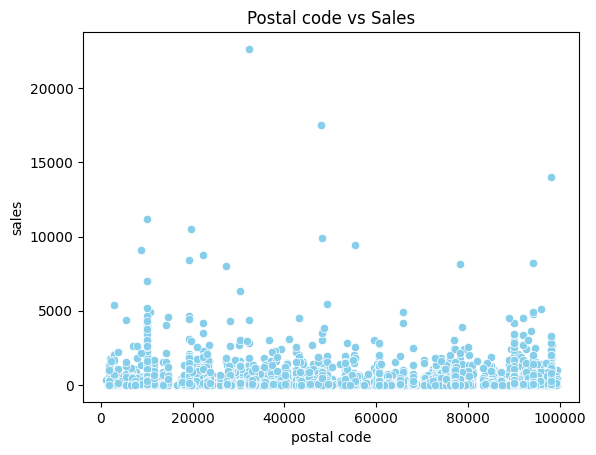

In [ ]:
sns.scatterplot(x='postal code',y='sales',data=df,color='skyblue')
plt.title('Postal code vs Sales')
plt.show()

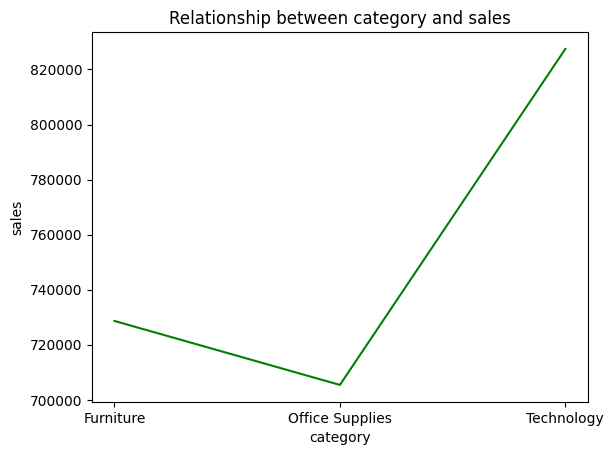

In [ ]:
categorywise_sales = df.groupby('category')['sales'].sum().reset_index()
sns.lineplot(x='category',y='sales',data=categorywise_sales,color='green')
plt.title('Relationship between category and sales')
plt.show()

<BarContainer object of 4 artists>

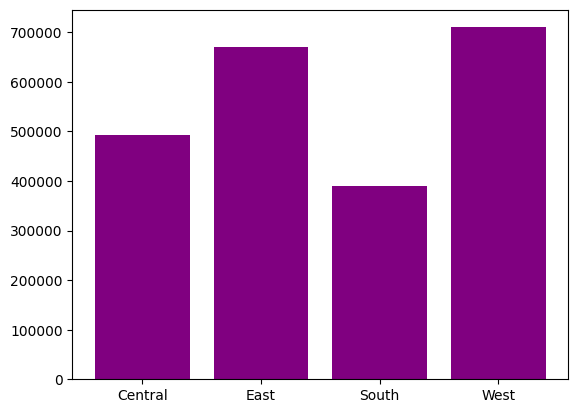

In [ ]:
# Comparing sales across different regions using stacked bar charts.
region_sales = df.groupby('region')['sales'].sum()
pivot_sales = region_sales.reset_index()
plt.bar(pivot_sales['region'],pivot_sales['sales'],color='purple')


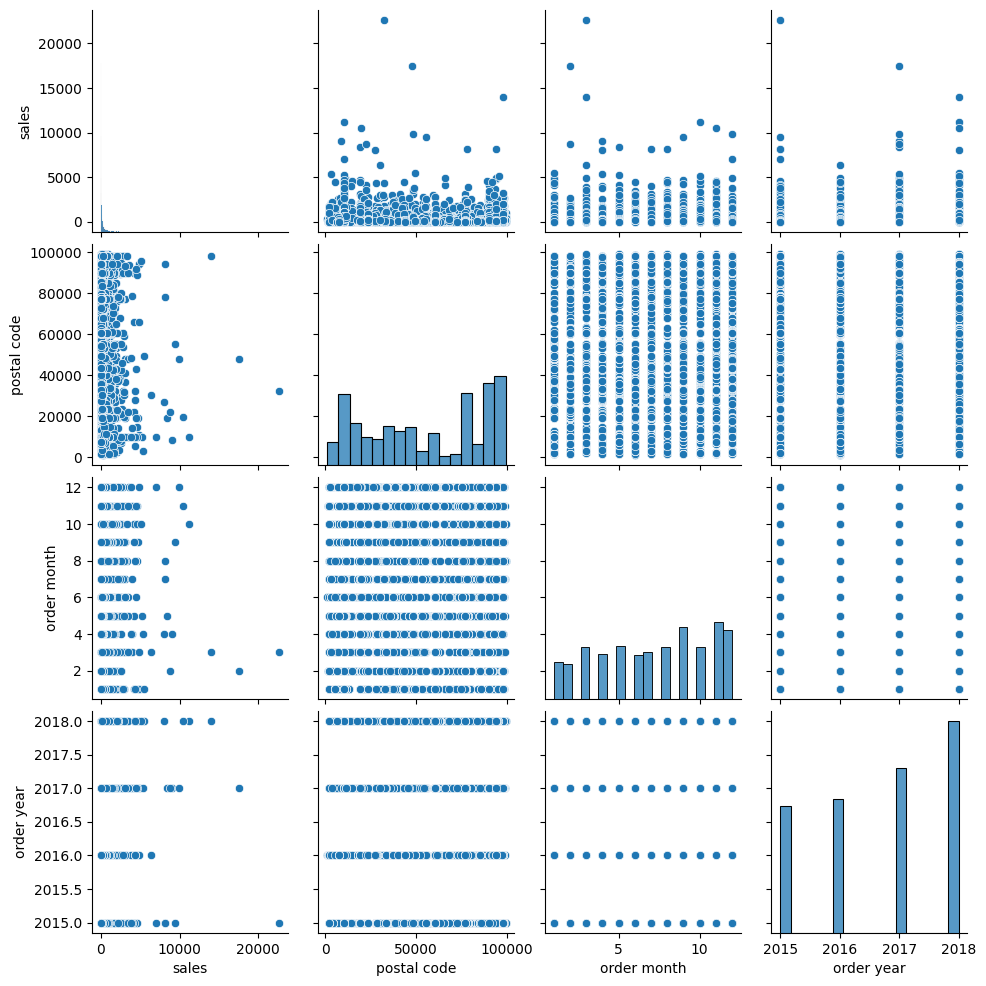

In [ ]:
numeric_variable = ['sales','postal code','order month','order year']
sns.pairplot(df[numeric_variable])

Summary of the visualization
1. Generated Heatmap of the data.
2. Plotted categorical plot of Ship mode vs Sales. From this it can be understood that Sales is more for second class ship mode. 
3. Plotted categorical plot of Category vs Sales. The Sales is more for the Technology category.
4. Generated different plots for Monthly sales, Qurterly sales and for Yearly sales.
5. Plotted distribution plot of Sales by Category.
6. Plotted Histogram of Sales, postal code, Monthly order and yearly order.
7. Plotted line plot of Time vs Sales. The sales is highest in 2015-01.
8. Plotted scatterplot of Postal code vs Sales.
9. Plotted  bar charts Comparing sales across different regions.
10. Plotted pairplot of the given Data.